# Libraries

In [1]:
library("tidyverse")
library("DESeq2")
library("ggrepel")
library("ggrastr")
library("msigdbr")
#library("ggnewscale")
theme_set(theme_classic())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The follow

# Skabkin 300

In [2]:
d.counts <- read_csv("data/star_counts.csv")

Rows: 55486 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene
dbl (8): total_wt1_IFNb, total_wt1, total_wt2_IFNb, total_wt2, total_wt3_IFN...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
d.meta <- left_join(
    read_csv("data/star_mapping.csv"),
    read.csv("data/star_meta.csv") %>% dplyr::rename(id=X)
) %>% 
    mutate(treatment=ifelse(str_detect(id, "IFNb"), "IFNb", "ctrl"),
           repl=str_extract(id, "wt\\d+")) %>%
    as.data.frame
rownames(d.meta) <- d.meta$id
head(d.meta)

Rows: 8 Columns: 34

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): id, star_mapfile, Started job on, Started mapping on, Finished on
dbl (29): Mapping speed, Million of reads per hour, Number of input reads, A...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Joining, by = "id"



,id,star_mapfile,Started job on,Started mapping on,Finished on,"Mapping speed, Million of reads per hour",Number of input reads,Average input read length,Uniquely mapped reads number,Uniquely mapped reads %,⋯,Number of reads unmapped: other,% of reads unmapped: other,Number of chimeric reads,% of chimeric reads,N_unmapped,N_multimapping,N_noFeature,N_ambiguous,treatment,repl
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>
total_wt1_IFNb,total_wt1_IFNb,star/total_wt1_IFNb/Log.final.out,Nov 19 10:46:16,Nov 19 10:46:30,Nov 19 10:51:37,724.70,61801203,50,31719970,51.33,⋯,92409,0.15,0,0,2798127,27283106,2362929,2856547,IFNb,wt1
total_wt1,total_wt1,star/total_wt1/Log.final.out,Nov 19 10:57:40,Nov 19 10:57:55,Nov 19 11:03:01,702.82,59739766,50,28823778,48.25,⋯,105975,0.18,0,0,3030245,27885743,2654843,2792482,ctrl,wt1
total_wt2_IFNb,total_wt2_IFNb,star/total_wt2_IFNb/Log.final.out,Nov 19 10:40:47,Nov 19 10:41:01,Nov 19 10:46:13,740.77,64199977,50,32488172,50.60,⋯,100899,0.16,0,0,2700363,29011442,2716786,2929124,IFNb,wt2
total_wt2,total_wt2,star/total_wt2/Log.final.out,Nov 19 10:51:40,Nov 19 10:51:57,Nov 19 10:57:37,712.40,67282662,50,21887596,32.53,⋯,73166,0.11,0,0,4216455,41178611,2355678,4062131,ctrl,wt2
total_wt3_IFNb,total_wt3_IFNb,star/total_wt3_IFNb/Log.final.out,Nov 19 11:03:03,Nov 19 11:03:18,Nov 19 11:07:38,757.86,54734258,50,30834858,56.34,⋯,112513,0.21,0,0,2549509,21349891,2812378,2336466,IFNb,wt3
total_wt3,total_wt3,star/total_wt3/Log.final.out,Nov 19 11:15:59,Nov 19 11:16:13,Nov 19 11:17:53,601.93,16720285,50,8198713,49.03,⋯,24846,0.15,0,0,979775,7541797,1094966,685185,ctrl,wt3


In [4]:
d.genes <- read_tsv("data/mart_export.txt") %>%
    dplyr::select(id=`Gene stable ID`, name=`Gene name`, description=`Gene description`)

Rows: 55029 Columns: 4

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): Gene stable ID version, Gene name, Gene stable ID, Gene description


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [5]:
d.counts.mat <- as.matrix(d.counts[2:ncol(d.counts)])
rownames(d.counts.mat) <- d.counts$gene
d.counts.mat[1:5,1:5]

,total_wt1_IFNb,total_wt1,total_wt2_IFNb,total_wt2,total_wt3_IFNb
ENSMUSG00000064842,1,0,0,0,0
ENSMUSG00000051951,21,37,23,36,17
ENSMUSG00000102851,0,0,0,0,0
ENSMUSG00000103377,0,0,1,0,0
ENSMUSG00000104017,0,0,0,0,0


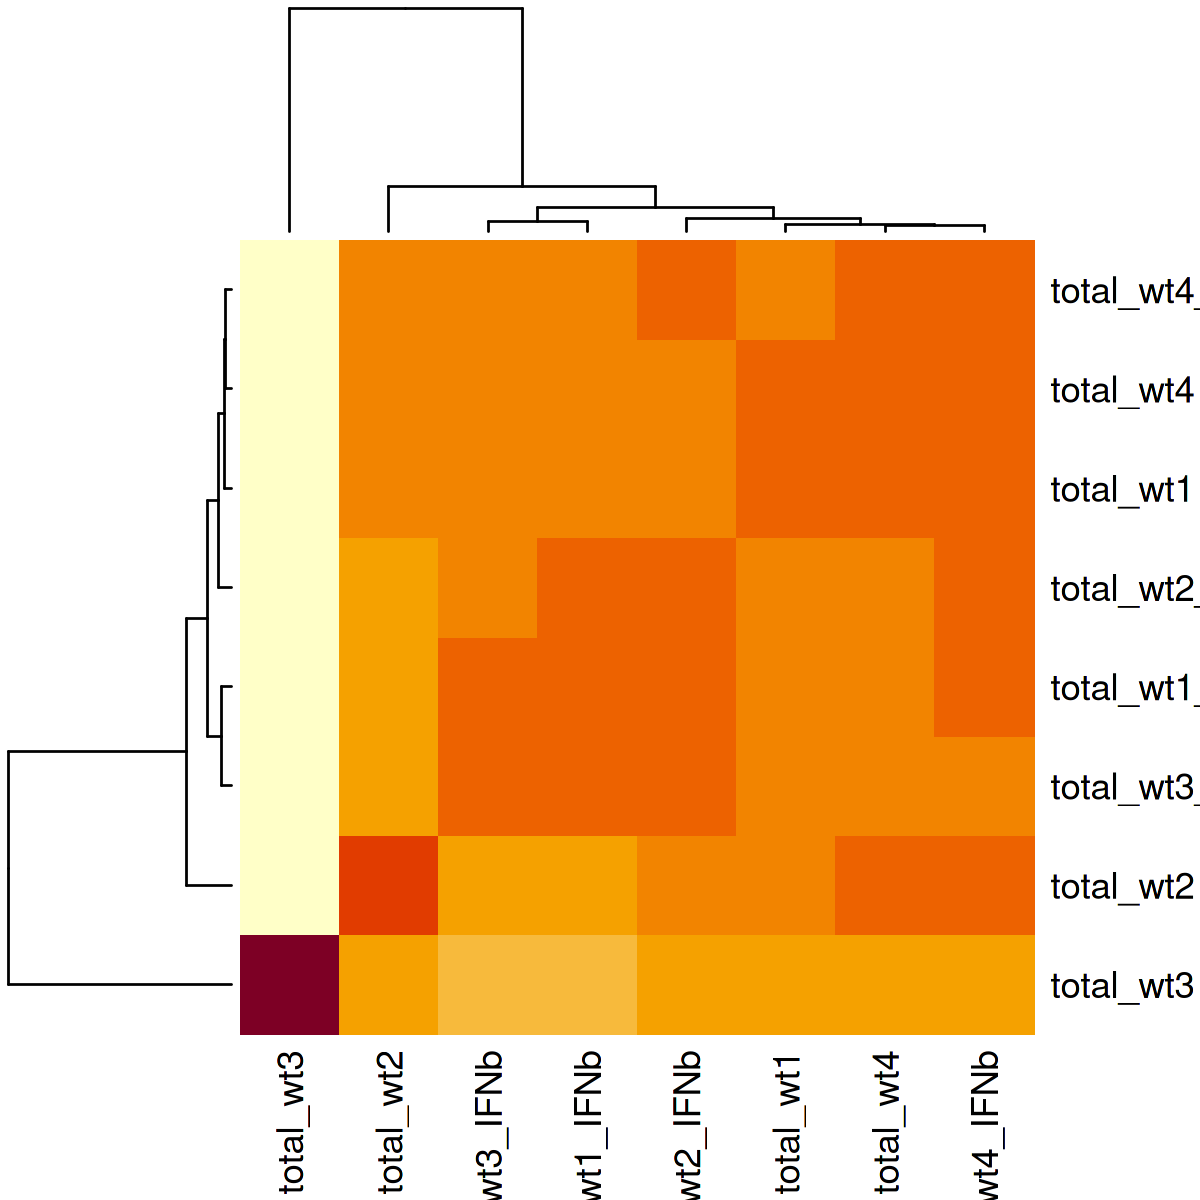

In [6]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=200)
d.counts.mat %>% cor %>% heatmap

In [7]:
d.deseq.data <- DESeqDataSetFromMatrix(countData=d.counts.mat, colData=d.meta, design=~treatment)
d.deseq <- DESeq(d.deseq.data, test="Wald")#, reduced=~1)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



Joining, by = "id"



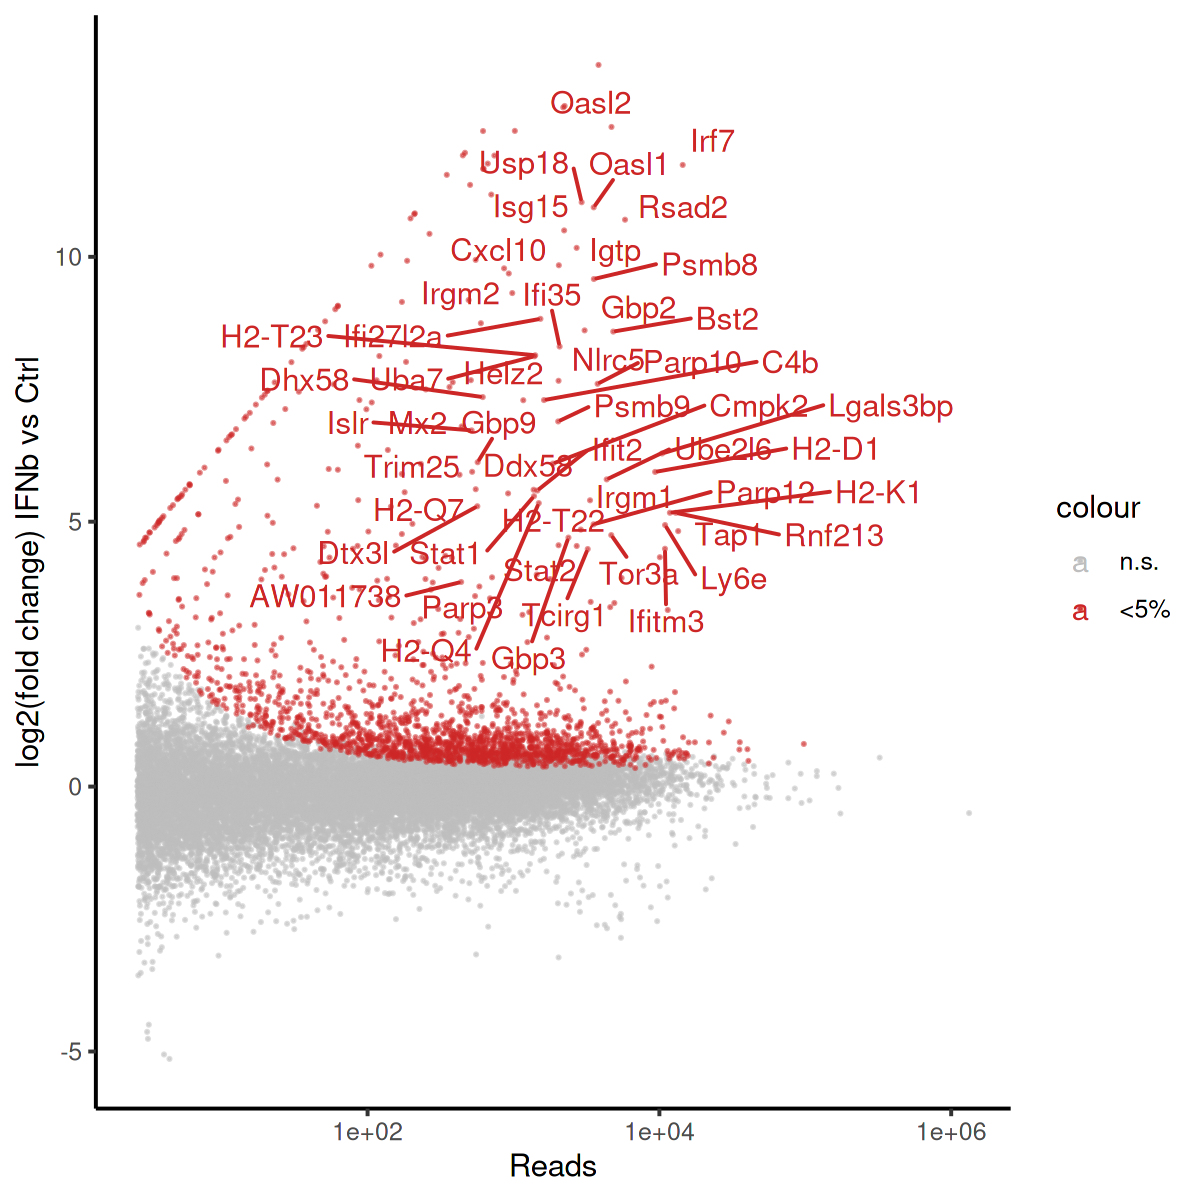

In [8]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=200)
d.res <- results(d.deseq, altHypothesis="greater", contrast=c("treatment", "IFNb", "ctrl")) %>% as.data.frame %>% mutate(id=rownames(.)) %>% arrange(padj) %>% left_join(d.genes)
d.res %>%
    ggplot(aes(baseMean, log2FoldChange)) +
    geom_point(aes(colour="n.s."), data=filter(d.res, padj>=0.05), size=0.1, alpha=0.5) +
    geom_point(aes(colour="<5%"), data=filter(d.res, padj<0.05), size=0.1, alpha=0.5) +
    geom_text_repel(aes(colour="<5%", label=name), data=head(d.res, 50), max.overlaps=1000) +
    scale_colour_manual(values=c("n.s."="gray", "<5%"="firebrick3")) +
    labs(x="Reads", y="log2(fold change) IFNb vs Ctrl") +
    scale_x_log10() 

Joining, by = "id"

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 24972 rows containing missing values (geom_point).”


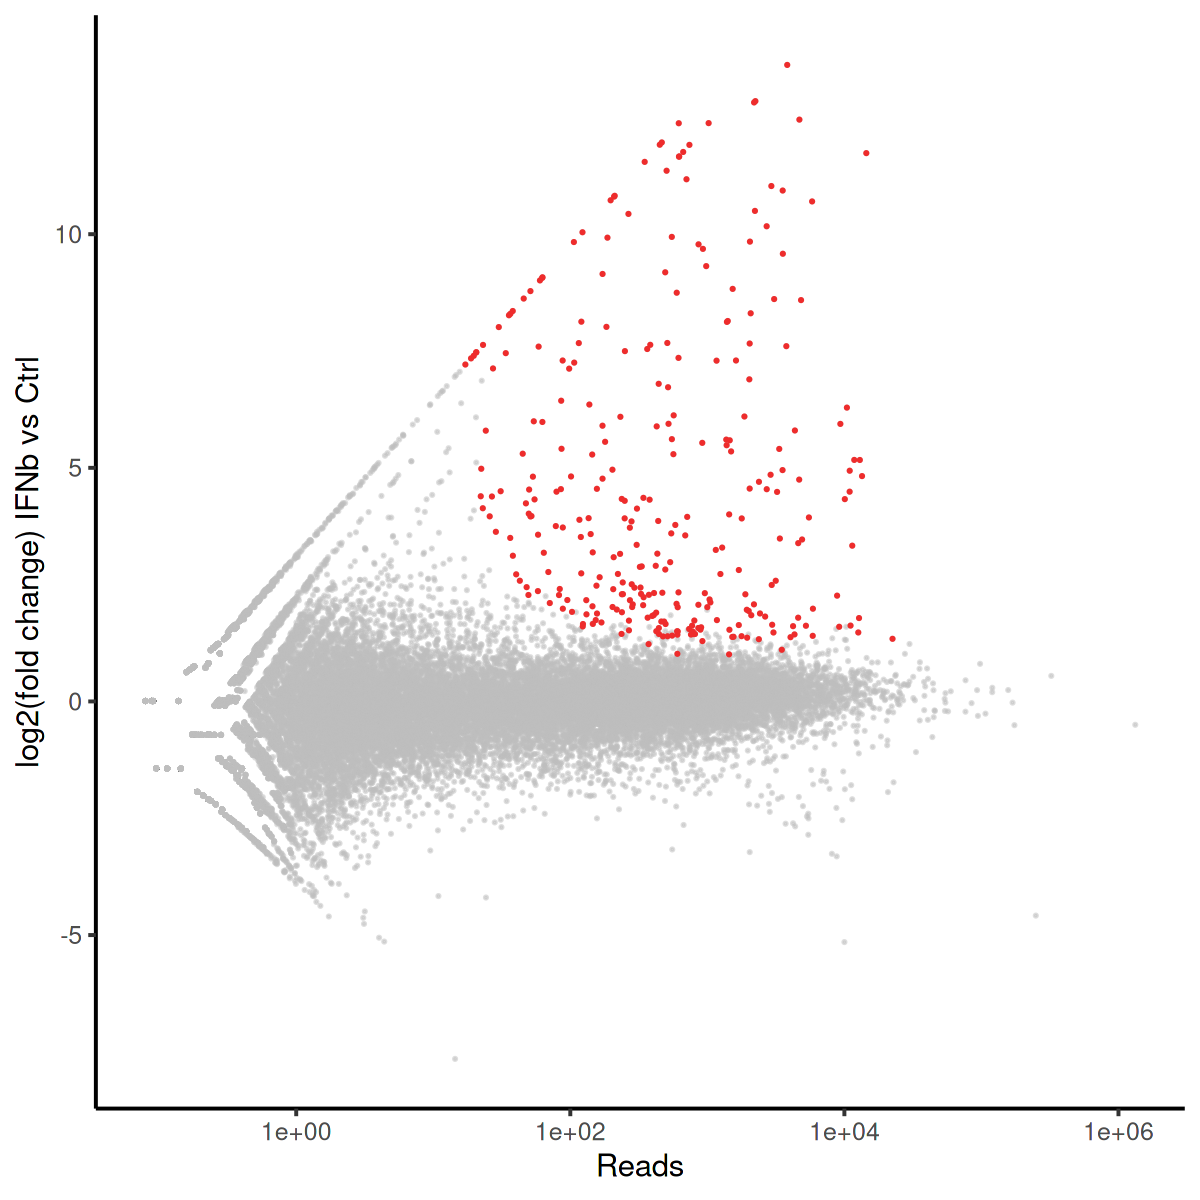

In [9]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=200)
d.res <- results(d.deseq, altHypothesis="greater", contrast=c("treatment", "IFNb", "ctrl")) %>% as.data.frame 
top.genes <- d.res %>% 
    arrange(padj) %>% 
    mutate(id=rownames(.)) %>%
    left_join(d.genes) %>%
    head(300)
d.res %>%
    ggplot(aes(baseMean, log2FoldChange)) +
    geom_point(colour="gray", data=d.res, size=0.1, alpha=0.5) +
    geom_point(colour="firebrick2", data=top.genes, size=0.1) +
    labs(x="Reads", y="log2(fold change) IFNb vs Ctrl") +
    scale_x_log10() 
writeLines(top.genes$name, "genesets/skabkin300.txt")

In [10]:
d.res %>%
    arrange(padj) %>%
    mutate(id=rownames(.)) %>%
    left_join(d.genes) %>%
    write_csv("DEBulkIFNb.csv")

Joining, by = "id"



Joining, by = "id"



png 
  2

png 
  2

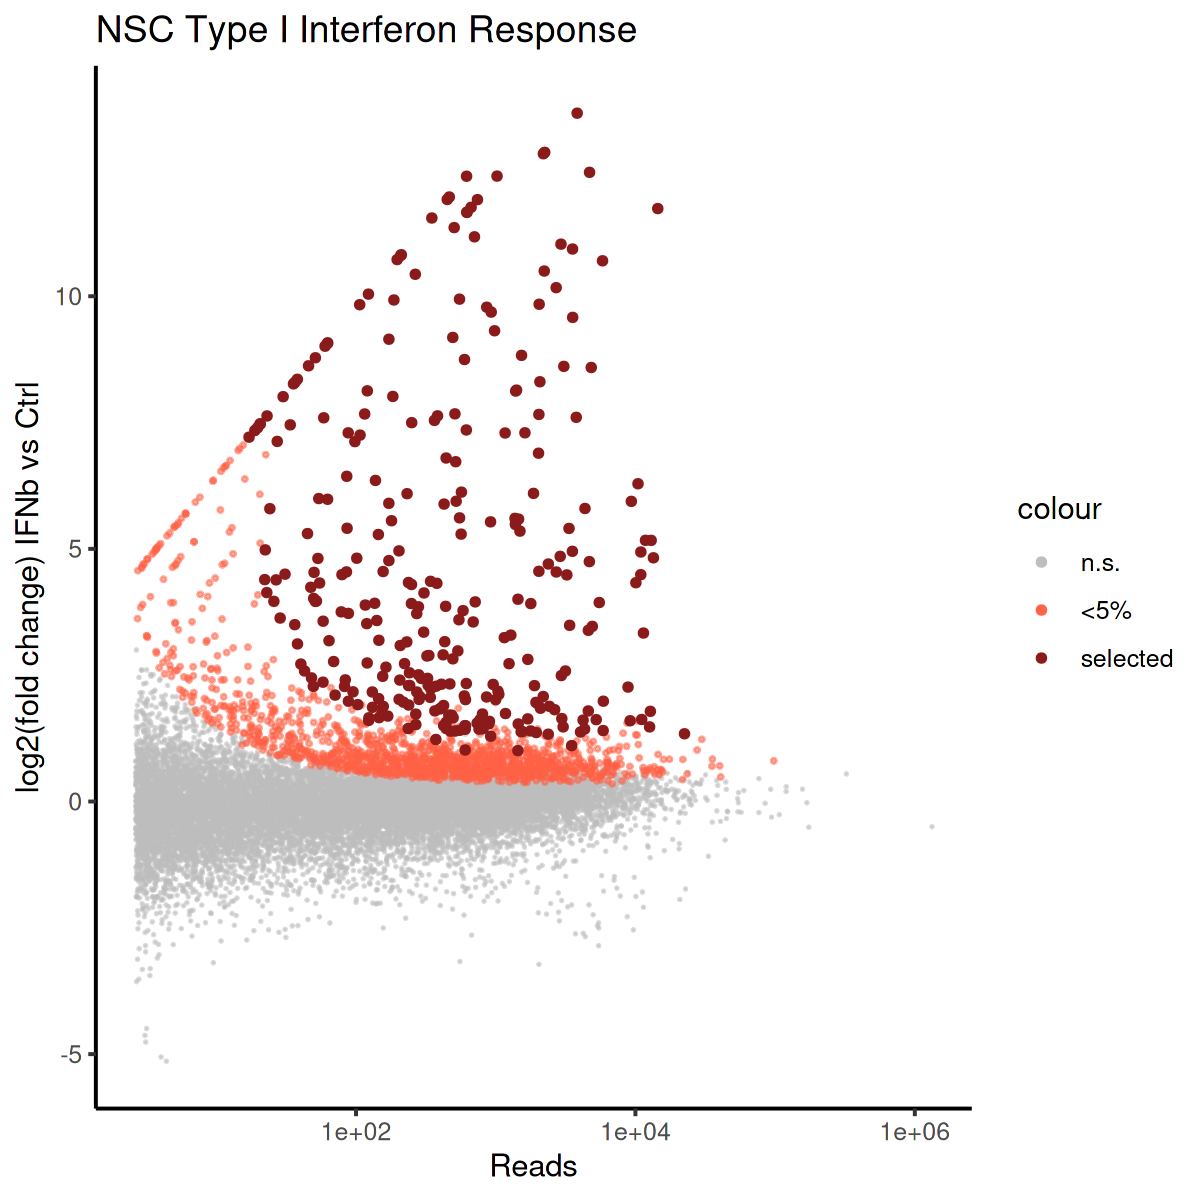

In [11]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=200)
d.res <- results(d.deseq, altHypothesis="greater", contrast=c("treatment", "IFNb", "ctrl")) %>% as.data.frame 
top.genes <- d.res %>% 
    arrange(padj) %>% 
    mutate(id=rownames(.)) %>%
    left_join(d.genes) %>%
    head(300)
d.res %>%
    ggplot(aes(baseMean, log2FoldChange)) +
    geom_point_rast(raster.dpi=400, aes(colour="n.s."), data=filter(d.res, padj>=0.05), size=0.1, alpha=0.5) +
    geom_point_rast(raster.dpi=400, aes(colour="<5%"), data=filter(d.res, padj<0.05), size=0.5, alpha=0.5) +
    geom_point(aes(colour="selected"), data=top.genes, size=1) +
    #geom_text_repel(aes(colour="selected", label=name), data=head(top.genes, 20), max.overlaps=50, nudge_x=100, force=9) +
    scale_colour_manual(values=c("n.s."="gray", "<5%"="tomato", selected="firebrick4")) +
    labs(x="Reads", y="log2(fold change) IFNb vs Ctrl", title="NSC Type I Interferon Response") +
    scale_x_log10() 
dev.print(pdf, "plots/skabkin300_ma.pdf", width=6, height=6)
dev.print(svglite::svglite, "plots/skabkin300_ma.svg", width=6, height=6, fix_text_size=F)

# Wu 

In [12]:
d.entrez <- read_tsv("data/entrez_ensembl.txt") %>%
    dplyr::rename(id=`Gene stable ID`, name=`Gene name`, entrez=`NCBI gene (formerly Entrezgene) ID`)
d.entrez %>% head

Rows: 55890 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Gene stable ID, Gene name
dbl (1): NCBI gene (formerly Entrezgene) ID


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



id,name,entrez
<chr>,<chr>,<dbl>
ENSMUSG00000064336,mt-Tf,NA
ENSMUSG00000064337,mt-Rnr1,NA
ENSMUSG00000064338,mt-Tv,NA
ENSMUSG00000064339,mt-Rnr2,NA
ENSMUSG00000064340,mt-Tl1,NA
ENSMUSG00000064341,mt-Nd1,17716


In [13]:
d.wu <- read_csv("data/rice_isg_mouse.csv") %>%
    dplyr::select(wu_symbol=`Symbol`, entrez=`Entrez Gene ID`) %>% left_join(d.entrez)
#d.w
str(d.wu)
sum(is.na(d.wu$id))

Rows: 404 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Symbol, Description
dbl (1): Entrez Gene ID


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Joining, by = "entrez"



tibble [404 × 4] (S3: tbl_df/tbl/data.frame)
 $ wu_symbol: chr [1:404] "ABCA9" "ABCE1" "ABLIM3" "ABTB2" ...
 $ entrez   : num [1:404] 217262 24015 319713 99382 14081 ...
 $ id       : chr [1:404] "ENSMUSG00000041797" "ENSMUSG00000058355" "ENSMUSG00000032735" "ENSMUSG00000032724" ...
 $ name     : chr [1:404] "Abca9" "Abce1" "Ablim3" "Abtb2" ...


[1] 0

In [14]:
writeLines(d.wu$name, "genesets/wu.txt")

In [15]:
length(intersect(d.wu$name, top.genes$name))

[1] 79

In [16]:
length(setdiff(d.wu$name, top.genes$name))

[1] 325

# Hallmark 

In [17]:
hallmarks <- c("HALLMARK_INFLAMMATORY_RESPONSE", "HALLMARK_INTERFERON_ALPHA_RESPONSE")
msig <- msigdbr::msigdbr(species="Mus musculus", category="H") %>% dplyr::filter(gs_name %in% hallmarks) 
hallmarks <- Map(function(name) dplyr::filter(msig, gs_name %in% name)$gene_symbol, hallmarks)

In [18]:
hallmarks

$HALLMARK_INFLAMMATORY_RESPONSE
  [1] "Abca1"    "Abi1"     "Acvr1b"   "Acvr2a"   "Adgre1"   "Adm"     
  [7] "Adora2b"  "Adrm1"    "Ahr"      "Aplnr"    "Aqp9"     "Atp2a2"  
 [13] "Atp2b1"   "Atp2c1"   "Axl"      "Bdkrb1"   "Best1"    "Bst2"    
 [19] "Btg2"     "C3ar1"    "C5ar1"    "Calcrl"   "Ccl17"    "Ccl2"    
 [25] "Ccl20"    "Ccl22"    "Ccl24"    "Ccl5"     "Ccl7"     "Ccr7"    
 [31] "Ccrl2"    "Cd14"     "Cd40"     "Cd48"     "Cd55"     "Cd55b"   
 [37] "Cd69"     "Cd70"     "Cd82"     "Cdkn1a"   "Chst2"    "Clec5a"  
 [43] "Cmklr1"   "Csf1"     "Csf3"     "Csf3r"    "Cx3cl1"   "Cxcl10"  
 [49] "Cxcl11"   "Cxcl5"    "Cxcl9"    "Cxcr6"    "Cybb"     "Dcbld2"  
 [55] "Ebi3"     "Edn1"     "Eif2ak2"  "Emp3"     "Ereg"     "F3"      
 [61] "Ffar2"    "Fpr1"     "Fzd5"     "Gabbr1"   "Gch1"     "Gna15"   
 [67] "Gnai3"    "Gp1ba"    "Gpc3"     "Gpr132"   "Gpr183"   "Has2"    
 [73] "Hbegf"    "Hif1a"    "Hpn"      "Hrh1"     "Icam1"    "Icam4"   
 [79] "Icosl"    "Ifitm1"   "Ifnar1"   "Ifngr2"   "Il10"     "Il10ra"  
 [85] "Il12b"    "Il15"     "Il15ra"   "Il18"     "Il18r1"   "Il18rap" 
 [91] "Il1a"     "Il1b"     "Il1r1"    "Il2rb"    "Il4ra"    "Il6"     
 [97] "Il7r"     "Inhba"    "Irak2"    "Irf1"     "Irf7"     "Itga5"   
[103] "Itgb3"    "Itgb8"    "Kcna3"    "Kcnj2"    "Kcnmb2"   "Kif1b"   
[109] "Klf6"     "Lamp3"    "Lck"      "Lcp2"     "Ldlr"     "Lif"     
[115] "Lpar1"    "Lta"      "Ly6e"     "Lyn"      "Marco"    "Mefv"    
[121] "Mep1a"    "Met"      "Mmp14"    "Msr1"     "Mxd1"     "Myc"     
[127] "Nampt"    "Ndp"      "Nfkb1"    "Nfkbia"   "Nlrp3"    "Nmi"     
[133] "Nmur1"    "Nod2"     "Npffr2"   "Olr1"     "Oprk1"    "Osm"     
[139] "Osmr"     "P2rx4"    "P2rx7"    "P2ry2"    "Pcdh7"    "Pde4b"   
[145] "Pdpn"     "Pik3r5"   "Plaur"    "Prok2"    "Psen1"    "Ptafr"   
[151] "Ptger2"   "Ptger4"   "Ptgir"    "Ptpre"    "Pvr"      "Raf1"    
[157] "Rasgrp1"  "Rela"     "Rgs1"     "Rgs16"    "Rhog"     "Ripk2"   
[163] "Rnf144b"  "Ros1"     "Rtp4"     "Scarf1"   "Scn1b"    "Sele"    
[169] "Selenos"  "Sell"     "Sema4d"   "Serpine1" "Sgms2"    "Slamf1"  
[175] "Slc11a2"  "Slc1a2"   "Slc28a2"  "Slc28a2b" "Slc31a1"  "Slc31a2" 
[181] "Slc4a4"   "Slc7a1"   "Slc7a2"   "Sphk1"    "Sri"      "Stab1"   
[187] "Tacr1"    "Tacr3"    "Tapbp"    "Timp1"    "Tlr1"     "Tlr2"    
[193] "Tlr3"     "Tnfaip6"  "Tnfrsf1b" "Tnfrsf9"  "Tnfsf10"  "Tnfsf15" 
[199] "Tnfsf9"   "Tpbg"     "Vip"     

$HALLMARK_INTERFERON_ALPHA_RESPONSE
  [1] "Adar"     "B2m"      "Batf2"    "Bst2"     "C1s2"     "Casp1"   
  [7] "Casp8"    "Ccrl2"    "Cd47"     "Cd74"     "Cmpk2"    "Cmtr1"   
 [13] "Cnp"      "Csf1"     "Cxcl10"   "Cxcl11"   "Ddx60"    "Dhx58"   
 [19] "Eif2ak2"  "Elf1"     "Epsti1"   "Gbp2"     "Gbp3"     "Gmpr"    
 [25] "Helz2"    "Herc6"    "H2-D1"    "H2-M3"    "H2-Q10"   "H2-Q2"   
 [31] "H2-Q7"    "H2-T23"   "Ifi27"    "Ifi27l2b" "Ifi30"    "Ifi35"   
 [37] "Ifi44"    "Ifi44l"   "Ifih1"    "Ifit2"    "Ifit3"    "Ifitm1"  
 [43] "Ifitm2"   "Ifitm3"   "Il15"     "Il4ra"    "Il7"      "Irf1"    
 [49] "Irf2"     "Irf7"     "Irf9"     "Isg15"    "Isg20"    "Lamp3"   
 [55] "Lap3"     "Lgals3bp" "Lpar6"    "Ly6e"     "Mov10"    "Mvb12a"  
 [61] "Mx2"      "Ncoa7"    "Nmi"      "Nub1"     "Oas1a"    "Oas1g"   
 [67] "Oasl1"    "Ogfr"     "Parp12"   "Parp14"   "Parp9"    "Plscr1"  
 [73] "Pnpt1"    "Procr"    "Psma3"    "Psmb8"    "Psmb9"    "Psme1"   
 [79] "Psme2"    "Ripk2"    "Rnf31"    "Rsad2"    "Rtp4"     "Samd9l"  
 [85] "Samd9l"   "Sell"     "Slc25a28" "Sp110"    "Stat2"    "Tap1"    
 [91] "Tdrd7"    "Tent5a"   "Tmem140"  "Trafd1"   "Trim14"   "Trim21"  
 [97] "Trim25"   "Trim26"   "Trim12c"  "Trim5"    "Txnip"    "Uba7"    
[103] "Ube2l6"   "Usp18"    "Wars"

In [19]:
map2(hallmarks, paste0("genesets/", names(hallmarks), ".txt"), writeLines)

$HALLMARK_INFLAMMATORY_RESPONSE
NULL

$HALLMARK_INTERFERON_ALPHA_RESPONSE
NULL

# SessionInfo

In [20]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Arch Linux

Matrix products: default
BLAS:   /usr/lib/libopenblasp-r0.3.14.so
LAPACK: /usr/lib/liblapack.so.3.9.1

locale:
 [1] LC_CTYPE=en_DK.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_DK.UTF-8        LC_COLLATE=en_DK.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_DK.UTF-8   
 [7] LC_PAPER=en_DK.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_DK.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] msigdbr_7.4.1               ggrastr_0.2.3              
 [3] ggrepel_0.9.1               DESeq2_1.30.1              
 [5] SummarizedExperiment_1.20.0 Biobase_2.50.0             
 [7] MatrixGenerics_1.2.1        matrixStats_0.60.1         
 [9] GenomicRanges_1.42.0        GenomeInfoDb_1